In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Setting default sizes and color for plots
plt.rcParams['figure.facecolor']='white'
plt.rcParams['figure.figsize']=(15,4)

# Loading DF

In [31]:
fpath = "/Users/echo/Documents/CodingDojo/Data_Visualization/Week 2/Project-4-Part-1/Data/Chicago/Crimes_-_2001_to_Present.csv"
df = pd.read_csv(fpath)
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
1,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11243268,JB167760,01/01/2017 12:01:00 AM,047XX N CLARK ST,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,APARTMENT,False,False,...,47.0,3.0,17,NaN,NaN,2017,09/13/2018 03:56:52 PM,NaN,NaN,NaN
3,1896258,G749215,12/15/2001 02:00:00 AM,011XX N STATE ST,0460,BATTERY,SIMPLE,STREET,False,False,...,NaN,NaN,08B,NaN,NaN,2001,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,11645527,JC212744,02/02/2015 10:00:00 AM,069XX W ARCHER AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,...,23.0,56.0,11,NaN,NaN,2015,04/06/2019 04:04:43 PM,NaN,NaN,NaN


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7877800 entries, 0 to 7877799
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [33]:
df.loc[0, "Date"]

'09/01/2018 12:01:00 AM'

In [35]:
drop_cols = ["Date", "ID", "Case Number", "Block", "Description", 
             "Location Description", "Arrest", "Domestic",
             "Beat", "Ward", "Community Area", "FBI Code", "X Coordinate",
            "Y Coordinate", "Updated On", "Latitude", "Longitude", "Location", "IUCR", "District"]
df_year = df.drop(columns=drop_cols).copy()
df_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7877800 entries, 0 to 7877799
Data columns (total 2 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   Primary Type  object
 1   Year          int64 
dtypes: int64(1), object(1)
memory usage: 120.2+ MB


# Crimes Across the Years

In [36]:
df_year = df_year.sort_index()
df_year.head()


,Primary Type,Year
0,THEFT,2018
1,DECEPTIVE PRACTICE,2016
2,SEX OFFENSE,2017
3,BATTERY,2001
4,DECEPTIVE PRACTICE,2015


In [37]:
crimes_by_year = df_year.groupby("Year")["Primary Type"].value_counts().sort_index()
crimes_by_year

Year  Primary Type                     
2001  ARSON                                 1011
      ASSAULT                              31384
      BATTERY                              93461
      BURGLARY                             26014
      CONCEALED CARRY LICENSE VIOLATION        1
                                           ...  
2023  ROBBERY                               6366
      SEX OFFENSE                            843
      STALKING                               313
      THEFT                                35439
      WEAPONS VIOLATION                     5731
Name: Primary Type, Length: 720, dtype: int64

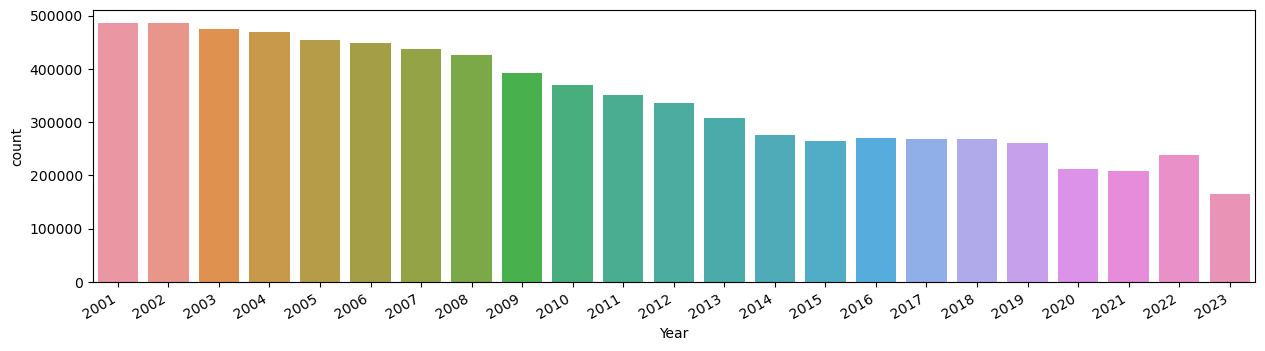

In [38]:
## Visualize years of crime
ax = sns.countplot(df_year, x='Year')
fig = ax.get_figure()
fig.autofmt_xdate()

## Q1) Is the total number of crimes increasing or decreasing across the years?
    * From our chart above, we can see the number of crimes is decreasing.

In [39]:
## convert to dataframe and reset_index()
plot_df = crimes_by_year.to_frame('# of Crimes').reset_index()
plot_df

,Year,Primary Type,# of Crimes
0,2001,ARSON,1011
1,2001,ASSAULT,31384
2,2001,BATTERY,93461
3,2001,BURGLARY,26014
4,2001,CONCEALED CARRY LICENSE VIOLATION,1
...,...,...,...
715,2023,ROBBERY,6366
716,2023,SEX OFFENSE,843
717,2023,STALKING,313
718,2023,THEFT,35439


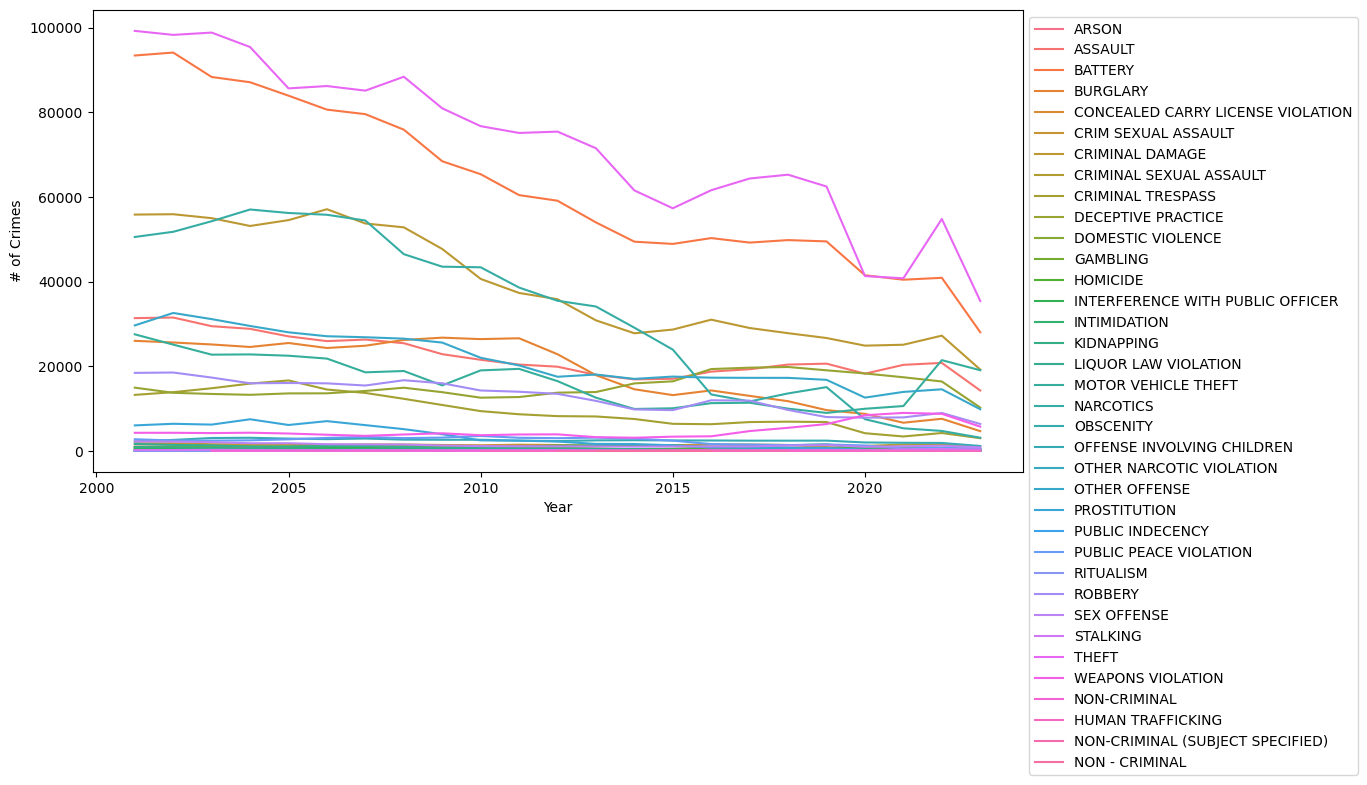

In [40]:
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(plot_df, x='Year', y="# of Crimes",markers=True,
                  hue='Primary Type',ax=ax,)
ax.legend(bbox_to_anchor=[1,1]);

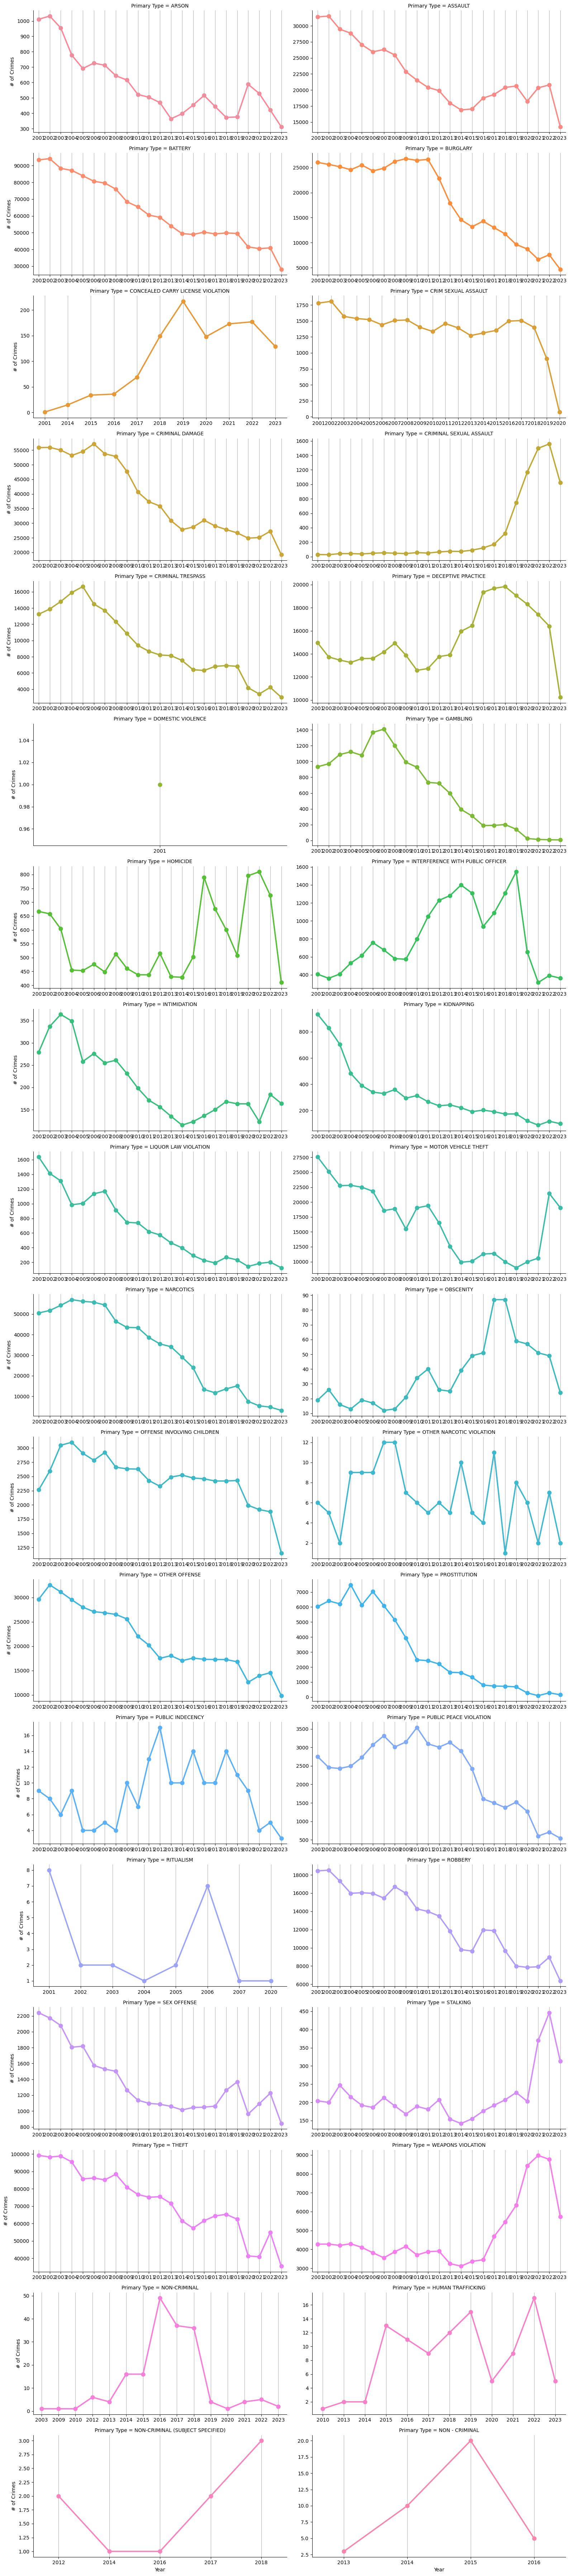

In [41]:
#catplot, which can produce many different kinds of figures
# specify col='Description' to produce a separate subplot for each category in the provided column name.
g = sns.catplot(data=plot_df, x='Year', y='# of Crimes',
                kind='point',aspect=2, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];

## Q2) Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

Crimes Increasing:
* Criminal 
* Sexual Assault
* Homicide, Stalking
* Weapons Violation increasing

# Comparing Police Districts

## Q3)Which district has the most crimes? Which has the least?

Most: District 8

Least: District 21

In [69]:
#Dropping columns we dont need
drop_cols = ["Date", "ID", "Case Number", "Block", "Description", 
             "Location Description", "Arrest", "Domestic",
             "Beat", "Ward", "Community Area", "FBI Code", "X Coordinate",
            "Y Coordinate", "Updated On", "Latitude", "Longitude", "Location", "IUCR", "Year"]
df_districts = df.drop(columns=drop_cols).copy()
df_districts

,Primary Type,District
0,THEFT,6.0
1,DECEPTIVE PRACTICE,8.0
2,SEX OFFENSE,19.0
3,BATTERY,18.0
4,DECEPTIVE PRACTICE,8.0
...,...,...
7877795,CRIMINAL DAMAGE,14.0
7877796,DECEPTIVE PRACTICE,12.0
7877797,CRIMINAL TRESPASS,24.0
7877798,BATTERY,14.0


In [70]:
df_districts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7877800 entries, 0 to 7877799
Data columns (total 2 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Primary Type  object 
 1   District      float64
dtypes: float64(1), object(1)
memory usage: 120.2+ MB


In [72]:
plot_df = df_districts.groupby("District")["Primary Type"].value_counts().sort_index()
plot_df

District  Primary Type                     
1.0       ARSON                                  125
          ASSAULT                              15111
          BATTERY                              33837
          BURGLARY                              5337
          CONCEALED CARRY LICENSE VIOLATION       21
                                               ...  
31.0      PUBLIC PEACE VIOLATION                   1
          ROBBERY                                  2
          SEX OFFENSE                              4
          STALKING                                 1
          THEFT                                   46
Name: Primary Type, Length: 755, dtype: int64

In [74]:
## convert to dataframe and reset_index()
plot_df = plot_df.to_frame('# of Crimes').reset_index()
plot_df

,District,Primary Type,# of Crimes
0,1.0,ARSON,125
1,1.0,ASSAULT,15111
2,1.0,BATTERY,33837
3,1.0,BURGLARY,5337
4,1.0,CONCEALED CARRY LICENSE VIOLATION,21
...,...,...,...
750,31.0,PUBLIC PEACE VIOLATION,1
751,31.0,ROBBERY,2
752,31.0,SEX OFFENSE,4
753,31.0,STALKING,1


In [78]:
district_sums = plot_df.groupby("District")["# of Crimes"].sum()
district_sums

District
1.0     319772
2.0     373452
3.0     399509
4.0     447255
5.0     348740
6.0     460688
7.0     454318
8.0     529054
9.0     384567
10.0    339447
11.0    504963
12.0    391118
14.0    304514
15.0    336767
16.0    263957
17.0    227327
18.0    353907
19.0    354358
20.0    139541
21.0         4
22.0    258071
24.0    238343
25.0    447834
31.0       247
Name: # of Crimes, dtype: int64

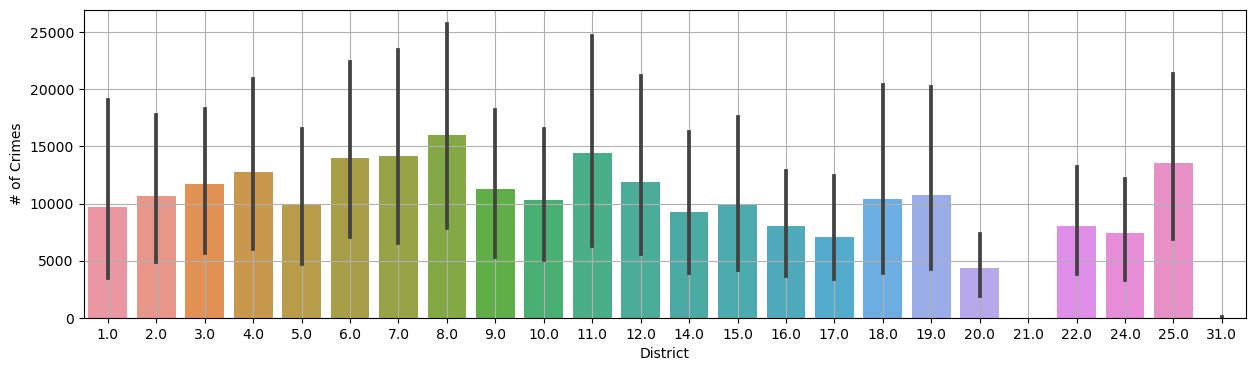

In [85]:
fig, ax = plt.subplots()
sns.barplot(plot_df, x='District', y='# of Crimes')
ax.grid();

# Comparing Months

In [86]:
# Set the datetime column as the index
#Setting format so date isnt interpreted as minutes
fmt = "%m/%d/%Y %I:%M:%S %p"
df["datetime"] = pd.to_datetime(df['Date'], format='%m/%d/%Y %H:%M:%S %p', errors='coerce')
# Set the date column as the index
df = df.set_index("datetime")
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
datetime,,,,,,,,,,,,,,,,,,,,,
2018-09-01 12:01:00,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2016-05-01 12:25:00,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2017-01-01 12:01:00,11243268,JB167760,01/01/2017 12:01:00 AM,047XX N CLARK ST,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,APARTMENT,False,False,...,47.0,3.0,17,NaN,NaN,2017,09/13/2018 03:56:52 PM,NaN,NaN,NaN
2001-12-15 02:00:00,1896258,G749215,12/15/2001 02:00:00 AM,011XX N STATE ST,0460,BATTERY,SIMPLE,STREET,False,False,...,NaN,NaN,08B,NaN,NaN,2001,08/17/2015 03:03:40 PM,NaN,NaN,NaN
2015-02-02 10:00:00,11645527,JC212744,02/02/2015 10:00:00 AM,069XX W ARCHER AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,...,23.0,56.0,11,NaN,NaN,2015,04/06/2019 04:04:43 PM,NaN,NaN,NaN


In [89]:
#Dropping columns we dont need
drop_cols = ["Date", "ID", "Case Number", "Block", "Description", 
             "Location Description", "Arrest", "Domestic",
             "Beat", "Ward", "Community Area", "FBI Code", "X Coordinate",
            "Y Coordinate", "Updated On", "Latitude", "Longitude", "Location", "IUCR", "Year", "District"]
df_months = df.drop(columns=drop_cols).copy()
df_months

,Primary Type
datetime,
2018-09-01 12:01:00,THEFT
2016-05-01 12:25:00,DECEPTIVE PRACTICE
2017-01-01 12:01:00,SEX OFFENSE
2001-12-15 02:00:00,BATTERY
2015-02-02 10:00:00,DECEPTIVE PRACTICE
...,...
2023-06-21 08:00:00,CRIMINAL DAMAGE
2023-05-13 12:00:00,DECEPTIVE PRACTICE
2023-06-24 01:29:00,CRIMINAL TRESPASS


In [91]:
#Grouping by month
df_months["Month"] = df.index.month
df_months["Month"]

datetime
2018-09-01 12:01:00     9
2016-05-01 12:25:00     5
2017-01-01 12:01:00     1
2001-12-15 02:00:00    12
2015-02-02 10:00:00     2
                       ..
2023-06-21 08:00:00     6
2023-05-13 12:00:00     5
2023-06-24 01:29:00     6
2023-06-20 04:00:00     6
2023-06-28 06:00:00     6
Name: Month, Length: 7877800, dtype: int64

In [93]:
## Get # of crimes by Hour
crimes_by_month = df_months.groupby('Primary Type')['Month'].value_counts().sort_index()
crimes_by_month

Primary Type       Month
ARSON              1          963
                   2          840
                   3         1140
                   4         1133
                   5         1284
                            ...  
WEAPONS VIOLATION  8        10437
                   9         9435
                   10        9190
                   11        7952
                   12        7401
Name: Month, Length: 415, dtype: int64